# Data Overview (Electronics Reviews)

This notebook demonstrates how to use the EDA utilities under `src/eda/` to compute quick statistics and visualizations from the processed dataset.


In [1]:
import sys
from pathlib import Path
import pprint

from pyspark.sql import SparkSession

ROOT = Path.cwd().parents[0]
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))

from src.eda.overview import basic_stats, rating_summary
from src.eda.activity import user_activity, item_popularity, plot_user_activity, plot_item_popularity
from src.eda.ratings import plot_distribution


In [2]:
spark = SparkSession.builder.appName("eda").getOrCreate()

processed_dir = Path("../data/processed")
interactions = spark.read.parquet(str(processed_dir / "interactions.parquet"))


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/10/10 20:10:58 WARN Utils: Your hostname, andres-ThinkPad-L15-Gen-2, resolves to a loopback address: 127.0.1.1; using 192.168.0.19 instead (on interface wlp9s0)
25/10/10 20:10:58 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/10 20:10:59 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
interactions.show(5)


+--------+--------+------+
|user_idx|item_idx|rating|
+--------+--------+------+
|   32879|     851|   2.0|
|  180982|   25809|   5.0|
|    1027|    3321|   5.0|
|    8760|    3321|   5.0|
|  141601|   10020|   4.0|
+--------+--------+------+
only showing top 5 rows


2025-10-10 20:11:05.818 | INFO     | src.eda.overview:basic_stats:17 - Computing basic stats
2025-10-10 20:11:12.577 | INFO     | src.eda.overview:rating_summary:31 - Computing rating summary
2025-10-10 20:11:15.372 | INFO     | src.eda.activity:user_activity:15 - Computing user activity counts


Basic stats:
{'num_rows': 1689188.0,
 'num_users': 192403.0,
 'num_items': 63001.0,
 'sparsity': 0.9998606462355166}
Rating summary:
{'count': 1689188.0,
 'mean': 4.222779228836577,
 'median': 5.0,
 'min': 1.0,
 'max': 5.0}


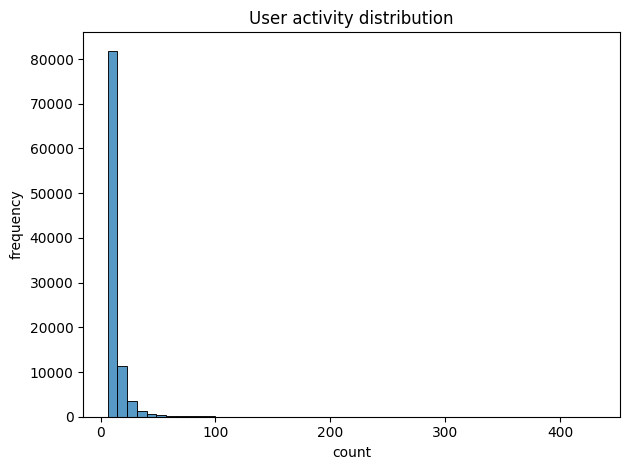

2025-10-10 20:11:23.265 | INFO     | src.eda.activity:item_popularity:23 - Computing item popularity counts


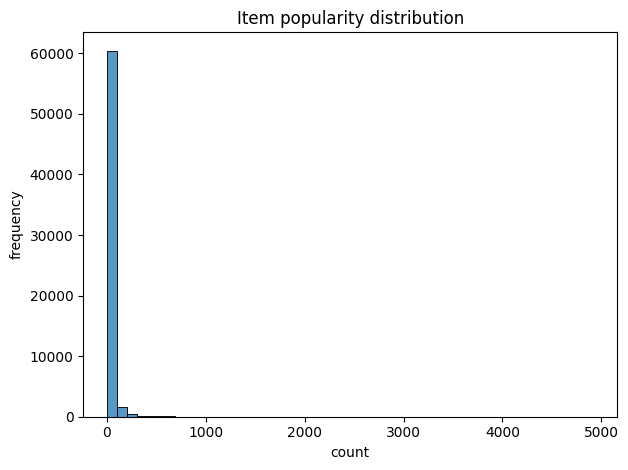

2025-10-10 20:11:25.359 | INFO     | src.eda.ratings:distribution:15 - Computing rating distribution


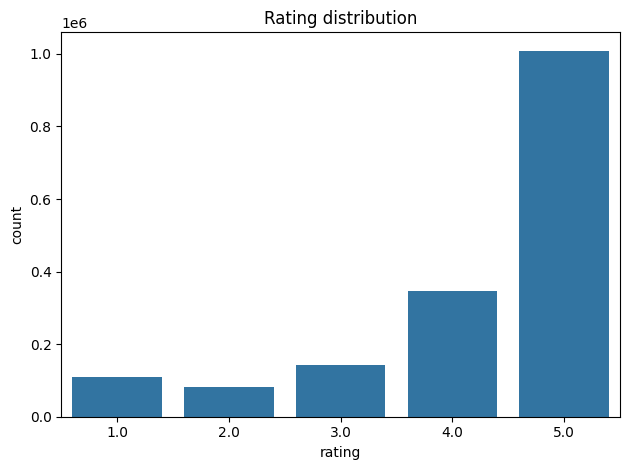

In [4]:
stats = basic_stats(interactions)
summary = rating_summary(interactions)

print("Basic stats:")
pprint.pprint(stats, sort_dicts=False)

print("Rating summary:")
pprint.pprint(summary, sort_dicts=False)

plot_user_activity(interactions)
plot_item_popularity(interactions)
plot_distribution(interactions)

spark.stop()


Note: For large datasets, the plotting utilities limit sample sizes. You can adjust the `sample` parameter in plotting calls if needed.
